In [1]:
import pytesseract
import cv2
import easyocr
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread("meter.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print(img.shape)

In [3]:
def grayscale(image):
    return cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)

img_ = grayscale(img)

# removing noise 
def remove_noise(image):
    return cv2.medianBlur(np.array(image), 5)

img_ = remove_noise(img_)

# threshold
thresh = cv2.threshold(img_, 180, 255, cv2.THRESH_BINARY)[1]

kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(thresh,kernel,iterations = 1)

img_opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
img_closing = cv2.morphologyEx(img_opening, cv2.MORPH_CLOSE, kernel)

# def pre_processing(image):
#   blur_img = cv2.GaussianBlur(image, (5, 5), 0)
#   edged = cv2.Canny(image, 30, 60)
#   return edged

# img_ = pre_processing(img_)  

In [4]:
def recognize_text(img):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en']) #initialize the OCR reader
    return reader.readtext(img) 

result = recognize_text(img_)
# result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
def overlay_ocr_text(image, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = Image.open(image)
#     img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    dpi = 450 #dots per inch
    fig_width, fig_height = int(image.shape[0]/dpi), int(image.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(image)

In [6]:
def desired_output(result):
    '''This function is made in order to extract the digits that are necessary to yeild'''
    digits = []
    for (bbox, text, prob) in result:
        if prob >= 0.3:
#         print(text)
            numbers = re.findall("([0-9]+[,.]+[0-9]+)", text)
            if numbers == [] and len(text) >= 4:
                number = re.findall("([0-9])", text)
                numbers = str(''.join(number))
            if numbers != []:
                digits.append(numbers)
            
    for element in digits: #this will remove the unnecessary elements from the digits list
        digits.remove("")
    return digits

In [7]:
import re #it is a library called regular expression that is used to find/match a string
from sty import fg, ef, rs, Style, RgbFg,bg, RgbBg #used for coloring the font

ef_dir=dir(ef)
fg_dir=dir(fg)

In [8]:
# recognize text
result = recognize_text(img_)
digits = desired_output(result)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.




Summary


Vavg = ['68.613'] V
Iavg = ['1635.8'] A
Ptot = ['336.106'] kW
E Del = ['3.2421'] MWh


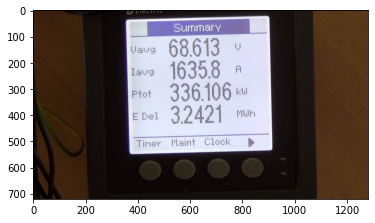

In [9]:
plt.imshow(img)
print("\n")
name = "Summary"
yellow_background_string = fg.da_red + bg.yellow + name + rs.all
print(yellow_background_string)
print("\n")

print("Vavg = {} V".format(digits[0]))
print("Iavg = {} A".format(digits[1]))
print("Ptot = {} kW".format(digits[2]))
print("E Del = {} MWh".format(digits[3]))